## Visualização e exploração dos dados do Covid-19 em Portugal

#### Dados extraídos de : 
- https://github.com/dssg-pt/covid19pt-data 
- https://www.dgs.pt/
- https://github.com/CSSEGISandData/COVID-19

## Obrigado pela vossa compilação, assim podemos acompanhar a evolução


In [1]:
#importacao de bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path
import pandas as pd
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
import numpy as np

In [2]:
PATH_DATA = "../"

In [3]:
#chamar o ficheiro do tipo csv
df_data = pd.read_csv(f"{PATH_DATA}data.csv")

In [4]:
df_data.tail()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro
24,21/03/2020,21/03/2020 00:00,1280,644,137,448,3,31,3,5,...,649.0,631.0,4,4,3,0,1,0,0,0
25,22/03/2020,22/03/2020 00:00,1600,825,180,534,5,35,4,7,...,821.0,779.0,5,4,4,0,1,0,0,0
26,23/03/2020,23/03/2020 00:00,2060,1007,238,737,5,42,11,9,...,1080.0,980.0,9,5,8,0,1,0,0,0
27,24/03/2020,24/03/2020 00:00,2362,1130,293,852,6,46,12,12,...,1234.0,1128.0,14,6,12,0,1,0,0,0
28,25/03/2020,25/03/2020 00:00,2995,1517,365,992,12,62,17,16,...,1586.0,1409.0,20,10,12,0,1,0,0,0


In [5]:
# Informação sobre os campos do ficheiro csv
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 56 columns):
data                                 29 non-null object
data_dados                           29 non-null object
confirmados                          29 non-null int64
confirmados_arsnorte                 29 non-null int64
confirmados_arscentro                29 non-null int64
confirmados_arslvt                   29 non-null int64
confirmados_arsalentejo              29 non-null int64
confirmados_arsalgarve               29 non-null int64
confirmados_acores                   29 non-null int64
confirmados_madeira                  29 non-null int64
confirmados_estrangeiro              14 non-null float64
confirmados_novos                    29 non-null int64
recuperados                          29 non-null int64
obitos                               29 non-null int64
internados                           21 non-null float64
internados_uci                       12 non-null float64
lab      

In [6]:
#estatistica descritiva dos dados
df_data.describe()

,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,confirmados_novos,...,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,14.000000,29.000000,...,7.000000,7.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.0,29.0,29.0
mean,494.862069,243.344828,55.241379,175.241379,1.275862,12.206897,2.034483,1.793103,7.428571,103.275862,...,895.142857,833.714286,1.827586,1.103448,1.551724,0.0,0.206897,0.0,0.0,0.0
std,810.288781,402.551884,97.523863,279.644501,2.697837,16.996595,4.178882,4.074128,3.857346,159.206716,...,427.972907,360.030422,4.713726,2.410466,3.365648,0.0,0.412251,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,390.000000,395.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,6.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,...,577.500000,572.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
50%,59.000000,36.000000,3.000000,17.000000,0.000000,3.000000,0.000000,0.000000,9.000000,18.000000,...,821.000000,779.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
75%,642.000000,289.000000,74.000000,243.000000,2.000000,21.000000,3.000000,1.000000,9.750000,143.000000,...,1157.000000,1054.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0
max,2995.000000,1517.000000,365.000000,992.000000,12.000000,62.000000,17.000000,16.000000,14.000000,633.000000,...,1586.000000,1409.000000,20.000000,10.000000,12.000000,0.0,1.000000,0.0,0.0,0.0


In [7]:
data1 = pd.read_csv(f"{PATH_DATA}data.csv", parse_dates=[0], index_col=[0], infer_datetime_format=True)
data1.fillna(value=0).head(5)

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro
data,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26/02/2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-02-27,27/02/2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-02-28,28/02/2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-02-29,29/02/2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2020-03-01,01/03/2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


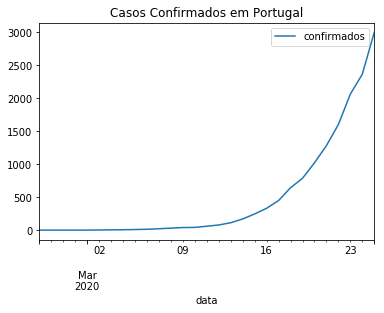

In [8]:
#Evolução do número de casos
data1[['confirmados']].plot(kind='line', title='Casos Confirmados em Portugal')

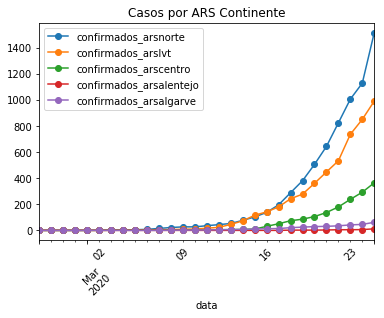

In [9]:
#Evolução do número de casos por ARS
data1[['confirmados_arsnorte', 'confirmados_arslvt', 'confirmados_arscentro', 'confirmados_arsalentejo', 'confirmados_arsalgarve',]].plot(kind='line', title='Casos por ARS Continente', linestyle='-', marker='o', rot=45, fontsize=10)

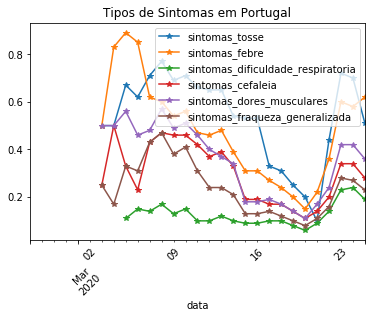

In [10]:
#Tipos de sintomas
data1[['sintomas_tosse' , 'sintomas_febre' , 'sintomas_dificuldade_respiratoria', 'sintomas_cefaleia' , 'sintomas_dores_musculares' , 'sintomas_fraqueza_generalizada']].plot(kind='line', title='Tipos de Sintomas em Portugal', linestyle='-', marker='*', rot=45, fontsize=10)

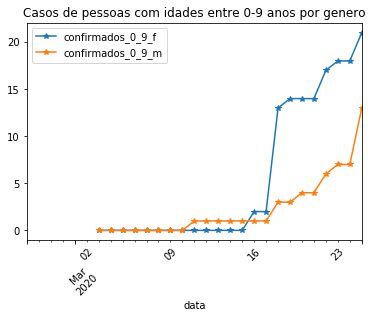

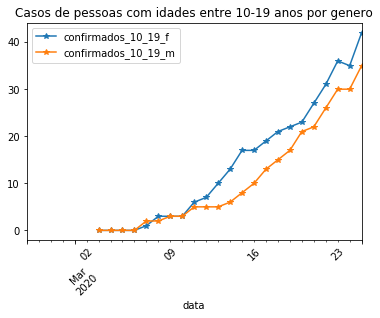

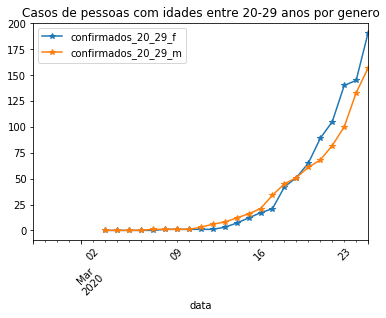

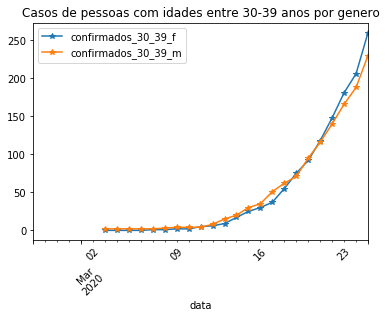

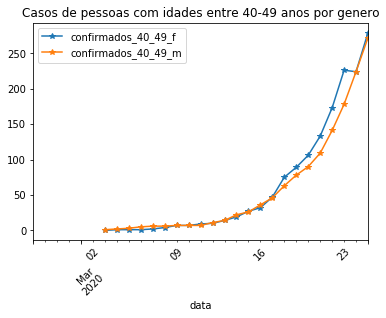

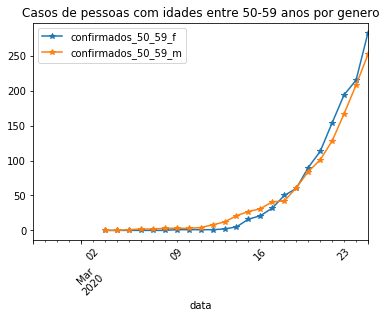

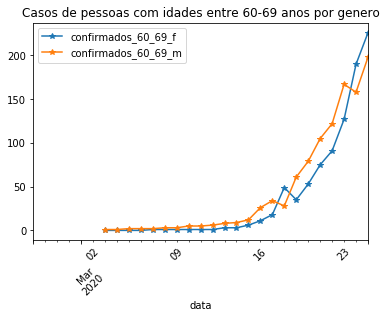

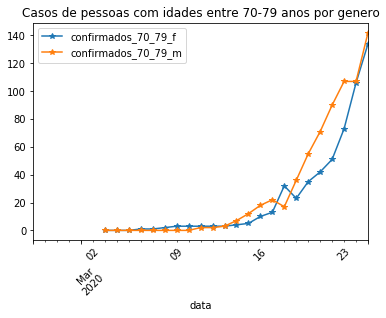

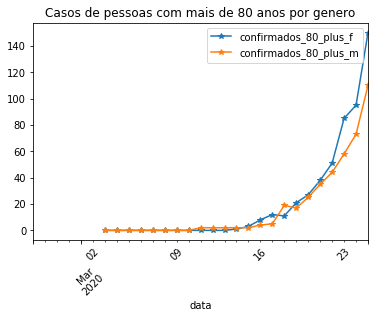

In [11]:
data1[['confirmados_0_9_f' , 'confirmados_0_9_m']].plot(kind='line', title='Casos de pessoas com idades entre 0-9 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_10_19_f' , 'confirmados_10_19_m']].plot(kind='line', title='Casos de pessoas com idades entre 10-19 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_20_29_f' , 'confirmados_20_29_m']].plot(kind='line', title='Casos de pessoas com idades entre 20-29 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_30_39_f' , 'confirmados_30_39_m']].plot(kind='line', title='Casos de pessoas com idades entre 30-39 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_40_49_f' , 'confirmados_40_49_m']].plot(kind='line', title='Casos de pessoas com idades entre 40-49 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_50_59_f' , 'confirmados_50_59_m']].plot(kind='line', title='Casos de pessoas com idades entre 50-59 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_60_69_f' , 'confirmados_60_69_m']].plot(kind='line', title='Casos de pessoas com idades entre 60-69 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_70_79_f' , 'confirmados_70_79_m']].plot(kind='line', title='Casos de pessoas com idades entre 70-79 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_80_plus_f' , 'confirmados_80_plus_m']].plot(kind='line', title='Casos de pessoas com mais de 80 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)


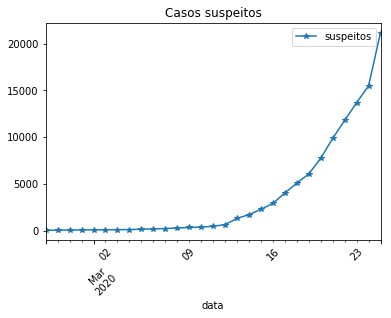

In [12]:
#Evolução dos suspeitos
data1[['suspeitos' ]].plot(kind='line', title='Casos suspeitos', linestyle='-', marker='*', rot=45, fontsize=10)

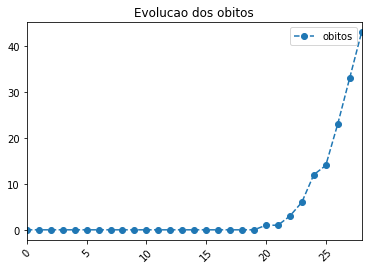

In [13]:
#obitos

df_data[['obitos']].plot(kind='line', title='Evolucao dos obitos', linestyle='--', marker='o', rot=45, fontsize=10)

## Ordinary Least Squares (OLS) -> Estimacao de parametros desconhecidos da regressão linear

In [14]:
confir = np.array([2, 4, 6, 9, 13, 21, 30, 39, 41, 59, 78, 112, 169, 245, 331, 448, 642, 785, 1020, 1280, 1600, 2060, 2362, 2995])

In [15]:
print (confir)

[   2    4    6    9   13   21   30   39   41   59   78  112  169  245
  331  448  642  785 1020 1280 1600 2060 2362 2995]


In [16]:
x = np.arange(len(confir))
x = add_constant(x)

In [17]:
modelo = OLS(np.log(confir[:23]), x[:23])

In [18]:
resultado = modelo.fit()

In [19]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2379.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           4.26e-23
Time:                        21:40:42   Log-Likelihood:                 4.9055
No. Observations:                  23   AIC:                            -5.811
Df Residuals:                      21   BIC:                            -3.540
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2513      0.083     15.146      0.000       1.079       1.423
x1             0.3137      0.006     48.771      0.000       0.300       0.327
==============================================================================
Omnibus:                        7.837   Durbin-Watson:                   0.401
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                5.564
Skew:                          -1.085   Prob(JB):                       0.0619
Kurtosis:                       4.046   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

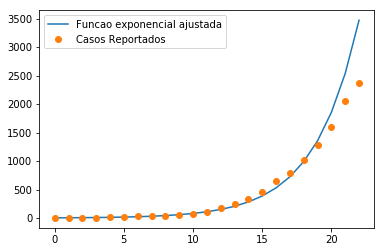

In [20]:
plt.plot(
    np.exp(resultado.predict(x[:23])),
    label="Funcao exponencial ajustada"      
)
plt.plot(confir[:23], "o", label="Casos Reportados")
plt.legend()
plt.show()